In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/heart_disease.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
X = data.drop('target', axis=1) # Input Variable / Attributes
Y = data['target'] # Output Variable / Label

In [6]:
# Split the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [7]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [8]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [9]:
# Define the model architecture
model = Sequential()
model.add(Dense(32, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [10]:
# Compiling the model
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001) # Here, we have set our learning rate as 0.001
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

In [11]:
# Print the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


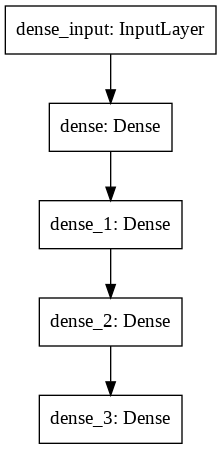

In [12]:
# Plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [16]:
# Train the model
training = model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4631 - accuracy: 0.7927 - val_loss: 0.6021 - val_accuracy: 0.7347
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4725 - accuracy: 0.7668 - val_loss: 0.4359 - val_accuracy: 0.8163
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4404 - accuracy: 0.7772 - val_loss: 0.3578 - val_accuracy: 0.8367
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.7668 - val_loss: 0.4158 - val_accuracy: 0.8163
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.7772 - val_loss: 0.6254 - val_accuracy: 0.7347
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4678 - accuracy: 0.7668 - val_loss: 0.3709 - val_accuracy: 0.8776
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4769 - accuracy: 0.7668 - val_loss: 0.8800 - val_accuracy: 0.6531
Epoch 8/100
2

In [17]:
# Evaluate the model
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.3801 - accuracy: 0.8852


[0.3800618648529053, 0.8852459192276001]